# Sex-specific eQTL

In [1]:
library(tidyverse)
library(data.table)
library(VennDiagram)
library(ggsci)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘hms’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: grid

Loading required package: futile.logger



In [2]:
setwd("../results/")

### 1. HCP

In [3]:
df_m <- data.frame("HCP" = seq(10, 100, 10),
                   "Count" = NA, 
                   "Group" = "Male, n=332")
for (i in seq(10, 100, 10)) {
    df_m[i/10, "Count"] <- read.table(paste0("ALL_m_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}

In [4]:
df_f <- data.frame("HCP" = seq(10, 100, 10),
                   "Count" = NA, 
                   "Group" = "Female, n=297")
for (i in seq(10, 100, 10)) {
    df_f[i/10, "Count"] <- read.table(paste0("ALL_f_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}

In [5]:
df <- rbind(df_m, df_f)

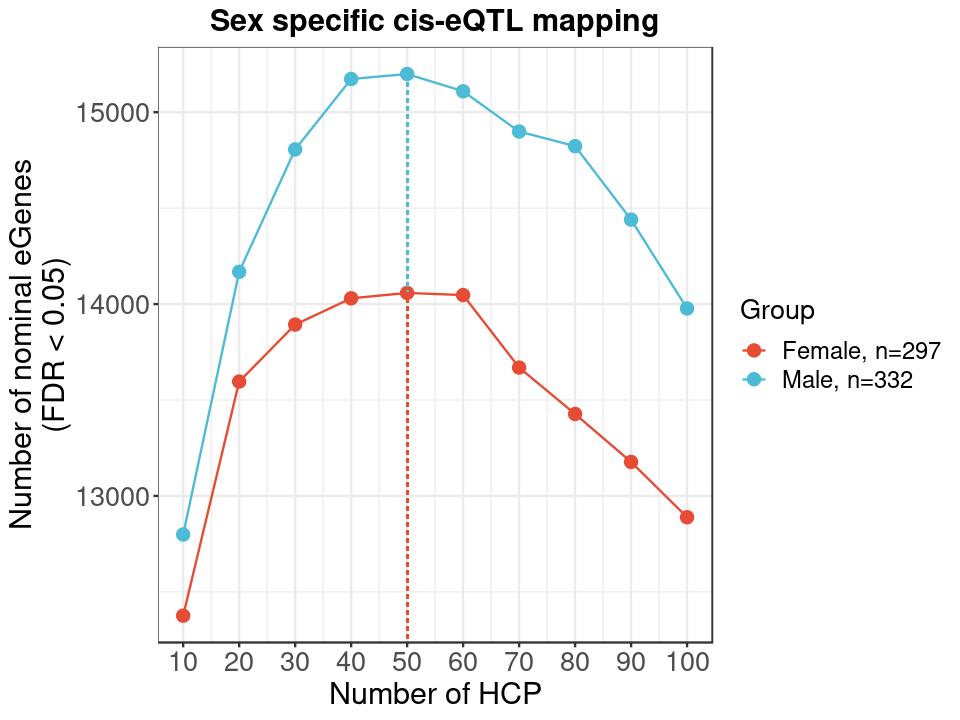

In [23]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(df, aes(x = HCP, y = Count, color = Group)) +
    geom_point(size = 3) +
    geom_line() +
    scale_x_continuous(breaks = seq(0,110,by = 10)) +
    geom_segment(x = 50, y = 0, xend = 50, yend = 15199, linetype = "dashed", color = "#4DBBD5FF") +
    geom_segment(x = 50, y = 0, xend = 50, yend = 14058, linetype = "dashed", color = "#E64B35FF") +
    labs(x = "Number of HCP", y = "Number of nominal eGenes\n(FDR < 0.05)",
         title = "Sex specific cis-eQTL mapping") +
    theme_bw() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
#     scale_color_npg()
    scale_color_manual(values = c("#E64B35FF", "#4DBBD5FF"))

In [24]:
ggsave("../figures/sex_nominal.pdf", width = 8, height = 6)

In [3]:
female_df <- read.table("../../sqtl_new/results/outputs_fetal_ALL_sex_specific_sqtl_female/fetal_ALL_sex_specific_sqtl_female.cisnominal.wholeIntron.HCPtitration.table.txt", header = T)
male_df <- read.table("../../sqtl_new/results/outputs_fetal_ALL_sex_specific_sqtl_male/fetal_ALL_sex_specific_sqtl_male.cisnominal.wholeIntron.HCPtitration.table.txt", header = T)

In [8]:
df <- rbind(male_df, female_df)
df$Group <- c(rep("Male, n=335", 10), rep("Female, n=305", 10))

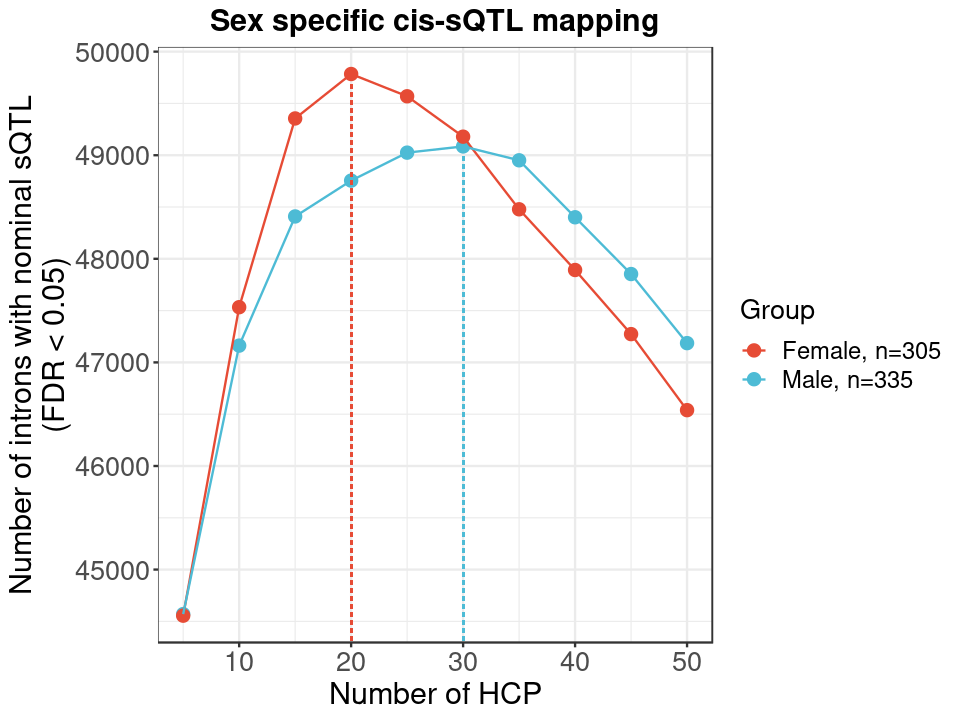

In [10]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(df, aes(x = n_hcps, y = n_introns_nominal, color = Group)) +
    geom_point(size = 3) +
    geom_line() +
    scale_x_continuous(breaks = seq(0,110,by = 10)) +
    geom_segment(x = 30, y = 0, xend = 30, yend = 49085, linetype = "dashed", color = "#4DBBD5FF") +
    geom_segment(x = 20, y = 0, xend = 20, yend = 49784, linetype = "dashed", color = "#E64B35FF") +
    labs(x = "Number of HCP", y = "Number of introns with nominal sQTL\n(FDR < 0.05)",
         title = "Sex specific cis-sQTL mapping") +
    theme_bw() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
#     scale_color_npg()
    scale_color_manual(values = c("#E64B35FF", "#4DBBD5FF"))

In [11]:
ggsave("../../sqtl_new/figures/sex_nominal_sqtl.pdf", width = 8, height = 6)

### 2. eGene

In [18]:
male_gene <- fread("ALL_m_perm_50hcp/sig_pheno.txt", data.table = F)
female_gene <- fread("ALL_f_perm_50hcp/sig_pheno.txt", data.table = F)

In [19]:
bulk <- fread("mixed_perm_90hcp/sig_pheno.txt", data.table = F)

In [20]:
sum(unique(bulk$pid) %in% unique(male_gene$pid)) #n12
sum(unique(male_gene$pid) %in% unique(female_gene$pid)) #n23
sum(unique(bulk$pid) %in% unique(female_gene$pid)) #n13
length(Reduce(intersect, list(unique(bulk$pid),
                              unique(male_gene$pid),
                              unique(female_gene$pid)))) #n123

[1] 5085

[1] 3499

[1] 4460

[1] 3483

In [7]:
sum(unique(male_gene$pid) %in% unique(female_gene$pid))
length(unique(male_gene$pid)) #n2
length(unique(female_gene$pid)) #n3
dim(male_gene)
dim(female_gene)

[1] 3499

[1] 5681

[1] 5006

[1] 5681   13

[1] 5006   13

png 
  2

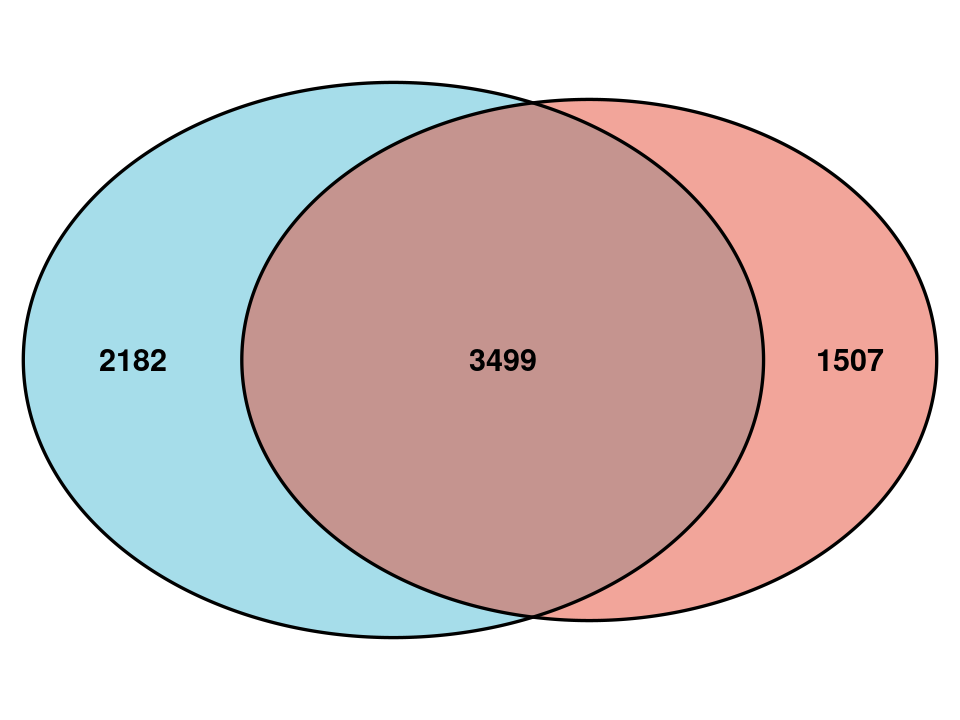

In [22]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(5006, 5681, 3499, 
                              fill = c("#E64B35FF", "#4DBBD5FF"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../figures/sex_egene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

png 
  2

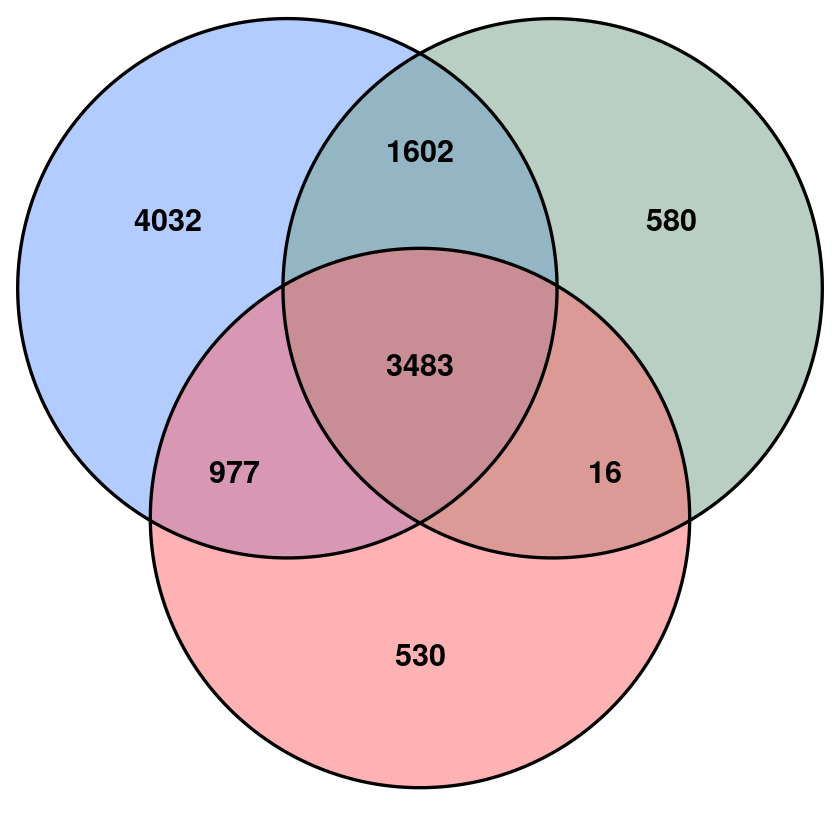

In [9]:
myCol <- c("#6699FF", "#74A089", "#FD6467")
# area1, area2, area3, n12, n23, n13, n123
venn.plot <- draw.triple.venn(10094, 5681, 5006, 5085, 3499, 4460, 3483, 
                              fill = myCol,
                              alpha = c(.5,.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",7),
                              category = c("", "", ""), 
                              scaled = TRUE)
pdf("../figures/bulk_sex_egene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

### 3: gProfiler
Input file:
- gene IDs
- SNP IDs
- chromosomal intervals

Questions:
- interval strand?
- multi query? Comparative?
- Exclusive lists? Or male, female-specific

In [4]:
shared <- intersect(unique(male_gene$pid), unique(female_gene$pid))
length(shared)

[1] 3499

In [5]:
male_only <- setdiff(unique(male_gene$pid), shared)
length(male_only)
female_only <- setdiff(unique(female_gene$pid), shared)
length(female_only)

[1] 2182

[1] 1507

In [11]:
write.table(data.frame(shared), "ALL_m_perm_50hcp/shared_egene.txt", 
            col.names = F, row.names = F, quote = F, sep = "\t")
write.table(data.frame(male_only), "ALL_m_perm_50hcp/male_only_egene.txt", 
            col.names = F, row.names = F, quote = F, sep = "\t")
write.table(data.frame(female_only), "ALL_f_perm_50hcp/female_only_egene.txt", 
            col.names = F, row.names = F, quote = F, sep = "\t")

### 4: sex-specific eGene

In [3]:
expr <- fread("../data/genes.629.bed.gz", data.table = F) # combat, VST, no cov
meta <- read.table("../metadata_654.tsv", header = T)
# head(meta)
meta <- meta %>% filter(Subject %in% colnames(expr))

In [50]:
expr.gene <- expr %>% filter(ID == "ENSG00000197249") %>% select(meta$Subject)
df <- t(expr.gene) %>% as.data.frame()
dim(df)

[1] 629   1

`zcat filtered.hg19.sorted.removeGeneOutlier.dose.tsv.gz | awk 'NR == 1 || ($1 == 14 && $2 == 94852658) {print}' > rs1980616_dose.tsv`

In [51]:
dose.sid <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/rs1980616_dose.tsv", check.names = F, header = T)
dose.sid
dim(dose.sid)

CHROM,POS,REF,ALT,849,898,1038,1039,1046,1102,...,RNAID2099,RNAID2100,RNAID2101,RNAID2102,RNAID2103,RNAID2111,RNAID2139,RNAID2141,RNAID2142,RNAID2144
<int>,<int>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,94852658,C,TRUE,0,1,0,1,0,0,...,1,0,0,0,0,0,1,2,0,0


[1]   1 633

In [52]:
dose.sid <- dose.sid %>% select(meta$Subject)
dose.sid <- as.data.frame(t(dose.sid))
df$Genotype <- dose.sid[,1]
dim(df)

[1] 629   2

In [53]:
df$Sex <- meta$inferSex
table(df$Sex)


  F   M 
297 332 

In [54]:
df$Sex <- as.factor(df$Sex)
df$Genotype <- as.factor(df$Genotype)
table(df$Genotype, df$Sex)

   
      F   M
  0 193 221
  1  95  99
  2   9  12

In [55]:
colnames(df) <- c("SERPINA1", "rs1980616", "Sex")
levels(df$rs1980616) <- c(levels(df$rs1980616), "C/C", "T/C", "T/T")
df$rs1980616[df$rs1980616 == 0] <- 'C/C'
df$rs1980616[df$rs1980616 == 1] <- 'T/C'
df$rs1980616[df$rs1980616 == 2] <- 'T/T'

In [57]:
df$geno.num <- as.numeric(df$rs1980616)-3

In [59]:
df$geno.fac <- factor(df$geno.num)

In [63]:
table(df$rs1980616)


  0   1   2 C/C T/C T/T 
  0   0   0 414 194  21 

In [67]:
library(ggbeeswarm)

`geom_smooth()` using formula 'y ~ x'



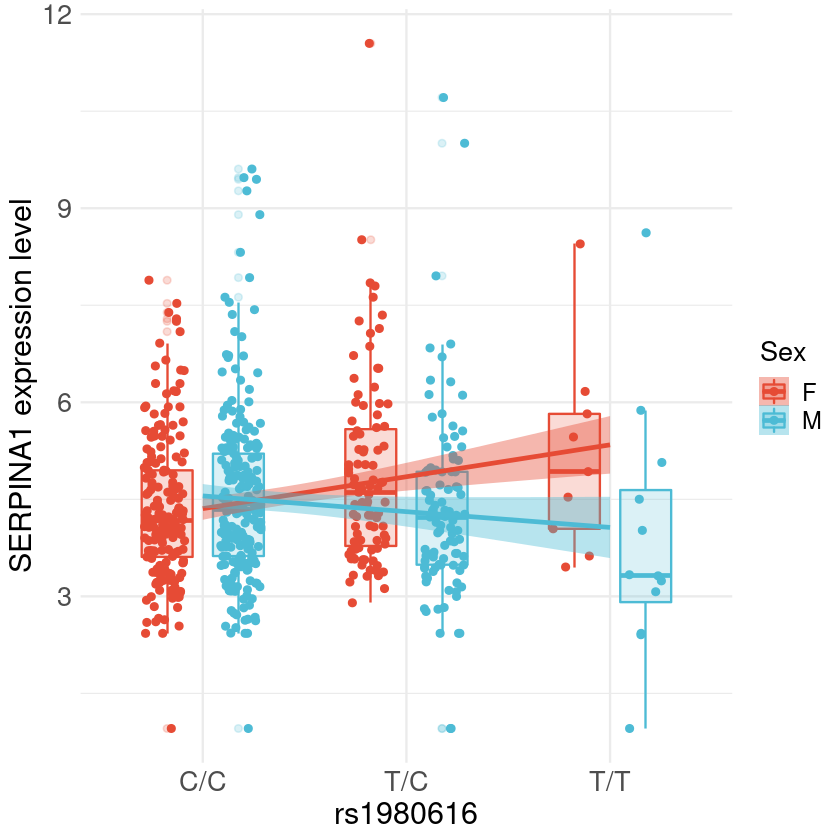

In [69]:
ggplot(df, aes(x = geno.num, y = SERPINA1, color = Sex, fill = Sex)) +
    geom_boxplot(aes(x = geno.fac),
                 alpha = 0.2, width = 0.5, position = position_dodge(width = 0.7)) + 
    geom_point(position = position_jitterdodge()) +
    geom_smooth(method = "lm", fullrange = TRUE) +
    labs(y = "SERPINA1 expression level", x = "rs1980616") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_fill_manual(values = c("#E64B35FF", "#4DBBD5FF")) +
    scale_color_manual(values = c("#E64B35FF", "#4DBBD5FF")) +
    scale_x_discrete(labels = c("1" = "C/C", "2" = "T/C", "3" = "T/T"))

In [70]:
ggsave("../figures/SERPINA1.pdf", height = 6, width = 6)

`geom_smooth()` using formula 'y ~ x'



**Looking for example**
- First searched in female-only eGenes. No good example. Many have low MAC. More of a power issue
- Here search in all nominal significant eGene-eQTL pairs, and rank by tstat of beta difference between male/female

In [128]:
male_all <- fread("../results/ALL_m_nominal_50hcp/all_assoc.txt.gz", data.table = F)

In [145]:
female_all <- fread("../results/ALL_f_nominal_50hcp/all_assoc.txt.gz", data.table = F)

In [146]:
dim(male_all)
dim(female_all)

[1] 187820592         6

[1] 187820592         6

In [150]:
sum(male_all$sid == female_all$sid)

[1] 187820592

In [156]:
df_all <- cbind(male_all, female_all)
colnames(df_all)[4] <- "npval.m"
colnames(df_all)[5] <- "slope.m"
colnames(df_all)[6] <- "fdr.m"
colnames(df_all)[10] <- "npval.f"
colnames(df_all)[11] <- "slope.f"
colnames(df_all)[12] <- "fdr.f"
df_all <- df_all %>% select(-c(7:9))

In [157]:
head(df_all)

,pid,sid,dist,npval.m,slope.m,fdr.m,npval.f,slope.f,fdr.f
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000223972,rs61769339,650753,0.309274,0.1154410,0.9483058,0.0967995,-0.188887,0.8675978
2,ENSG00000223972,rs200188737,654380,0.928740,0.0447546,0.9978042,0.6469650,-0.173564,0.9864113
3,ENSG00000223972,rs12238997,681862,0.400248,0.0957117,0.9626793,0.1023430,-0.184681,0.8728279
4,ENSG00000223972,rs61769351,681954,0.342685,0.1068210,0.9541029,0.2883970,-0.117248,0.9491115
5,ENSG00000223972,rs142559957,692768,0.241652,0.2213950,0.9323383,0.2125390,0.255058,0.9303052
6,ENSG00000223972,rs142576295,696206,0.928740,0.0447546,0.9978042,0.0993597,-0.548298,0.8700246


In [158]:
df_all <- df_all %>% filter(fdr.m < 0.05 | fdr.f < 0.05)

In [159]:
write.table(df_all, "/u/scratch/c/cindywen/sex_nom_fdr.tsv", col.names = T, row.names = F, quote=F, sep = "\t")

In [160]:
dim(df_all)

[1] 849494      9

In [162]:
df_all_1 <- df_all %>% mutate(zscore.m = sign(slope.m)*abs(qnorm(npval.m/2)), se.m = slope.m/zscore.m)

In [164]:
df_all_1 <- df_all_1 %>% mutate(zscore.f = sign(slope.f)*abs(qnorm(npval.f/2)), se.f = slope.f/zscore.f)

In [166]:
df_all_1 <- df_all_1 %>% mutate(tstat = (slope.f-slope.m)/sqrt(se.f^2 + se.m^2))

In [169]:
head(df_all_1 %>% arrange(desc(abs(tstat))))

,pid,sid,dist,npval.m,slope.m,fdr.m,npval.f,slope.f,fdr.f,zscore.m,se.m,zscore.f,se.f,tstat
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000111530,rs149551813,550823,3.57044e-01,-0.1205110,0.95648212,1.10185e-19,-1.496300,4.568940e-16,-0.9210123,0.13084624,-9.078398,0.1648198,-6.537580
2,ENSG00000111530,chr12:66861096,-408262,8.11871e-01,0.0206346,0.99349004,8.45731e-14,-0.938895,1.895375e-10,0.2380130,0.08669526,-7.463002,0.1258066,-6.280245
3,ENSG00000205927,chr21:33257816,231878,2.49227e-03,0.4124000,0.29644833,4.86456e-07,-0.735010,3.810095e-04,3.0242784,0.13636311,-5.031579,0.1460794,-5.741783
4,ENSG00000111530,rs12296178,-391454,4.95173e-01,-0.0592941,0.97340367,1.87281e-13,-0.939453,3.985952e-10,-0.6821043,0.08692820,-7.357575,0.1276851,-5.698044
5,ENSG00000166676,chr16:11647224,828429,2.52314e-05,-0.4774380,0.01043733,1.10360e-04,0.511542,4.008029e-02,-4.2127198,0.11333248,3.866607,0.1322974,5.677154
6,ENSG00000111530,rs12304211,-413705,6.69691e-01,0.0364031,0.98649710,4.31445e-11,-0.819322,6.897648e-08,0.4265721,0.08533867,-6.592856,0.1242742,-5.676301


In [170]:
gtf <- fread("../../salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)

In [171]:
df_all_1 <- df_all_1 %>% left_join(gtf, by = c("pid" = "ensg"))

In [174]:
df_all_1 <- df_all_1 %>% filter(V11 == "protein_coding")

In [176]:
dim(df_all_1)

[1] 460587     26

In [175]:
head(df_all_1 %>% arrange(desc(abs(tstat))))

,pid,sid,dist,npval.m,slope.m,fdr.m,npval.f,slope.f,fdr.f,zscore.m,...,V3,V4,V5,V6,V7,V8,V9,version,V11,V12
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ENSG00000111530,rs149551813,550823,3.57044e-01,-0.1205110,0.95648212,1.10185e-19,-1.496300,4.568940e-16,-0.9210123,...,gene,67663138,67713733,.,+,.,"gene_id ""ENSG00000111530.13_6""; gene_type ""protein_coding""; gene_name ""CAND1""; level 1; hgnc_id ""HGNC:30688""; havana_gene ""OTTHUMG00000169060.3_6""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";",13_6,protein_coding,CAND1
2,ENSG00000111530,chr12:66861096,-408262,8.11871e-01,0.0206346,0.99349004,8.45731e-14,-0.938895,1.895375e-10,0.2380130,...,gene,67663138,67713733,.,+,.,"gene_id ""ENSG00000111530.13_6""; gene_type ""protein_coding""; gene_name ""CAND1""; level 1; hgnc_id ""HGNC:30688""; havana_gene ""OTTHUMG00000169060.3_6""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";",13_6,protein_coding,CAND1
3,ENSG00000205927,chr21:33257816,231878,2.49227e-03,0.4124000,0.29644833,4.86456e-07,-0.735010,3.810095e-04,3.0242784,...,gene,34398243,34401504,.,+,.,"gene_id ""ENSG00000205927.5_6""; gene_type ""protein_coding""; gene_name ""OLIG2""; level 2; hgnc_id ""HGNC:9398""; havana_gene ""OTTHUMG00000065032.6_6""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";",5_6,protein_coding,OLIG2
4,ENSG00000111530,rs12296178,-391454,4.95173e-01,-0.0592941,0.97340367,1.87281e-13,-0.939453,3.985952e-10,-0.6821043,...,gene,67663138,67713733,.,+,.,"gene_id ""ENSG00000111530.13_6""; gene_type ""protein_coding""; gene_name ""CAND1""; level 1; hgnc_id ""HGNC:30688""; havana_gene ""OTTHUMG00000169060.3_6""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";",13_6,protein_coding,CAND1
5,ENSG00000166676,chr16:11647224,828429,2.52314e-05,-0.4774380,0.01043733,1.10360e-04,0.511542,4.008029e-02,-4.2127198,...,gene,10854776,10912651,.,-,.,"gene_id ""ENSG00000166676.16_7""; gene_type ""protein_coding""; gene_name ""TVP23A""; level 2; hgnc_id ""HGNC:20398""; havana_gene ""OTTHUMG00000177389.6_7""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";",16_7,protein_coding,TVP23A
6,ENSG00000111530,rs12304211,-413705,6.69691e-01,0.0364031,0.98649710,4.31445e-11,-0.819322,6.897648e-08,0.4265721,...,gene,67663138,67713733,.,+,.,"gene_id ""ENSG00000111530.13_6""; gene_type ""protein_coding""; gene_name ""CAND1""; level 1; hgnc_id ""HGNC:30688""; havana_gene ""OTTHUMG00000169060.3_6""; remap_status ""full_contig""; remap_num_mappings 1; remap_target_status ""overlap"";",13_6,protein_coding,CAND1


In [177]:
write.table(df_all_1, "~/project-gandalm/isoform_twas/eqtl_new/results/ALL_f_perm_50hcpsex_nom_fdr_protein.tsv", col.names = T, row.names = F, quote=F, sep = "\t")

In [178]:
length(unique(df_all_1$pid))

[1] 11138

In [3]:
df_all_1 <- fread("~/project-gandalm/isoform_twas/eqtl_new/results/ALL_f_perm_50hcpsex_nom_fdr_protein.tsv", data.table = F)

In [4]:
# head(df_all_1 %>% arrange(desc(abs(tstat))))
df_all_1 <- df_all_1 %>% select(-c(V1,V2,V3,V4,V5,V6,V7,V8,V9,version,V11)) %>% arrange(desc(abs(tstat)))

In [5]:
head(df_all_1)

,pid,sid,dist,npval.m,slope.m,fdr.m,npval.f,slope.f,fdr.f,zscore.m,se.m,zscore.f,se.f,tstat,V12
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,ENSG00000111530,rs149551813,550823,3.57044e-01,-0.1205110,0.95648212,1.10185e-19,-1.496300,4.568940e-16,-0.9210123,0.13084624,-9.078398,0.1648198,-6.537580,CAND1
2,ENSG00000111530,chr12:66861096,-408262,8.11871e-01,0.0206346,0.99349004,8.45731e-14,-0.938895,1.895375e-10,0.2380130,0.08669526,-7.463002,0.1258066,-6.280245,CAND1
3,ENSG00000205927,chr21:33257816,231878,2.49227e-03,0.4124000,0.29644833,4.86456e-07,-0.735010,3.810095e-04,3.0242784,0.13636311,-5.031579,0.1460794,-5.741783,OLIG2
4,ENSG00000111530,rs12296178,-391454,4.95173e-01,-0.0592941,0.97340367,1.87281e-13,-0.939453,3.985952e-10,-0.6821043,0.08692820,-7.357575,0.1276851,-5.698044,CAND1
5,ENSG00000166676,chr16:11647224,828429,2.52314e-05,-0.4774380,0.01043733,1.10360e-04,0.511542,4.008029e-02,-4.2127198,0.11333248,3.866607,0.1322974,5.677154,TVP23A
6,ENSG00000111530,rs12304211,-413705,6.69691e-01,0.0364031,0.98649710,4.31445e-11,-0.819322,6.897648e-08,0.4265721,0.08533867,-6.592856,0.1242742,-5.676301,CAND1


In [6]:
mac <- fread("../../genotype/all_data/isec_R2_greater_than_3/ancestry/filtered.hg19.sorted.removeGeneOutlier.AC.tsv", data.table = F)

In [8]:
df_all_1 <- df_all_1 %>% left_join(mac, by = c("sid" = "V1"))

In [19]:
head(df_all_1, 25)

,pid,sid,dist,npval.m,slope.m,fdr.m,npval.f,slope.f,fdr.f,zscore.m,se.m,zscore.f,se.f,tstat,V12,V2
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,ENSG00000111530,rs149551813,550823,3.57044e-01,-0.1205110,9.564821e-01,1.10185e-19,-1.4963000,4.568940e-16,-0.9210123,0.13084624,-9.078398,0.16481984,-6.537580,CAND1,12
2,ENSG00000111530,chr12:66861096,-408262,8.11871e-01,0.0206346,9.934900e-01,8.45731e-14,-0.9388950,1.895375e-10,0.2380130,0.08669526,-7.463002,0.12580661,-6.280245,CAND1,28
3,ENSG00000205927,chr21:33257816,231878,2.49227e-03,0.4124000,2.964483e-01,4.86456e-07,-0.7350100,3.810095e-04,3.0242784,0.13636311,-5.031579,0.14607939,-5.741783,OLIG2,32
4,ENSG00000111530,rs12296178,-391454,4.95173e-01,-0.0592941,9.734037e-01,1.87281e-13,-0.9394530,3.985952e-10,-0.6821043,0.08692820,-7.357575,0.12768514,-5.698044,CAND1,26
5,ENSG00000166676,chr16:11647224,828429,2.52314e-05,-0.4774380,1.043733e-02,1.10360e-04,0.5115420,4.008029e-02,-4.2127198,0.11333248,3.866607,0.13229738,5.677154,TVP23A,42
6,ENSG00000111530,rs12304211,-413705,6.69691e-01,0.0364031,9.864971e-01,4.31445e-11,-0.8193220,6.897648e-08,0.4265721,0.08533867,-6.592856,0.12427421,-5.676301,CAND1,28
7,ENSG00000144785,rs74090655,-976430,7.51454e-05,-0.8567430,2.593781e-02,8.66177e-05,0.9387410,3.302267e-02,-3.9593774,0.21638326,3.925311,0.23915072,5.567164,AC073896.1,43
8,ENSG00000144785,rs74090668,-965447,7.51454e-05,-0.8567430,2.593781e-02,8.66177e-05,0.9387410,3.302267e-02,-3.9593774,0.21638326,3.925311,0.23915072,5.567164,AC073896.1,43
9,ENSG00000197249,rs1980616,-4372,3.94584e-05,-0.3618930,1.525326e-02,1.38884e-04,0.4002070,4.784244e-02,-4.1106283,0.08803837,3.810147,0.10503715,5.560618,SERPINA1,236


**SERPINA1**
- for 6 SNPs that are nominal eQTL in either male or female, all has reversed sign of beta, male -, female +

In [20]:
df_all_1 %>% filter(V12 == "SERPINA1")

pid,sid,dist,npval.m,slope.m,fdr.m,npval.f,slope.f,fdr.f,zscore.m,se.m,zscore.f,se.f,tstat,V12,V2
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
ENSG00000197249,rs1980616,-4372,3.94584e-05,-0.361893,0.015253257,0.000138884,0.400207,0.04784244,-4.110628,0.08803837,3.810147,0.1050371,5.560618,SERPINA1,236
ENSG00000197249,rs56339332,-5164,4.24500e-05,-0.351586,0.016210821,0.000173788,0.393230,0.05682731,-4.093724,0.08588415,3.754356,0.1047397,5.498858,SERPINA1,240
ENSG00000197249,rs56019009,-5224,2.59580e-05,-0.378575,0.010695452,0.000801608,0.363153,0.16684754,-4.206305,0.09000180,3.352239,0.1083315,5.266442,SERPINA1,206
ENSG00000197249,rs3748313,-2990,1.43226e-04,-0.333460,0.043403356,0.000361033,0.372000,0.09715333,-3.802530,0.08769425,3.567042,0.1042881,5.177378,SERPINA1,236
ENSG00000197249,rs3748314,-3065,1.52970e-05,-0.407746,0.006820023,0.004211640,0.307954,0.40607283,-4.324368,0.09429032,2.861859,0.1076063,5.002355,SERPINA1,197
ENSG00000197249,rs3748316,-3166,8.15358e-05,-0.366690,0.027719438,0.001674660,0.333876,0.25897554,-3.939841,0.09307230,3.142580,0.1062426,4.959960,SERPINA1,207
